# Detection of breast cancers
Train model on CT and PET scans to predict malignant or benign cancer by validating it with histological positive or negative labels
- Radiologist accuracy: 80% -> Get an accuracy higher than 80%
### What to do
- Anatomical location of the region
- Characterization of the region
- Therapeutic choice
- Monitoring of the therapy to monitor patient's response to treatment
### Risk Assessment Analysis -> High Risk tools
Include Risk Assessment Analysis of the tool in pitch deck
- Include list of requirements of our system: operating system, tools, forms, etc, cybersecurity risks (login)
- Tool performances in terms of
    - Sensitivity (TP rate) -> **at least 90%**
    - FP rate
    - Time
### Model testing during presentation
**1 second as maximum response time for testing** -> model will be tested live during presentation
### Data privacy
- Require auth
- No personal info (name, surname, TAX ID code, address, etc)
- Cluster ages to reduce privacy risk (each 5 years?)
### Requirements
- DLL library to call functions from -> **segregation of functions**
- Must have **EXIT** button
- Cybersecurity of the tool
- AUC greather than 0.85
- Sensitivity higher than 0.90

### Ethics -> **INCLUDE IT**
Simulate that we actually got these documents in the first few slides
- Informed consent (got from the patient)
- Ethic Committee Approval (about 2 months after study request)
    - It was approved
- Anonimization
    - Define the measures in the data

### Methods to be used:
- Radiomics library
- Random Forest or SVM (choose one, maybe PCA to choose the best features)
- CNNs

### Dataset (with masks)
- 437 benign
- 210 malignant

In [10]:
import nibabel as nib
import matplotlib.pyplot as plt ## ciao

In [12]:
path = '../datasets/code__esempi/data/multiple-patients/MRI/mwp1-mri-1.nii'
img = nib.load(path).get_fdata()
img.shape
# ayoooo ## Andrea

FileNotFoundError: No such file or no access: '../datasets/code__esempi/data/multiple-patients/MRI/mwp1-mri-1.nii'

NameError: name 'img' is not defined

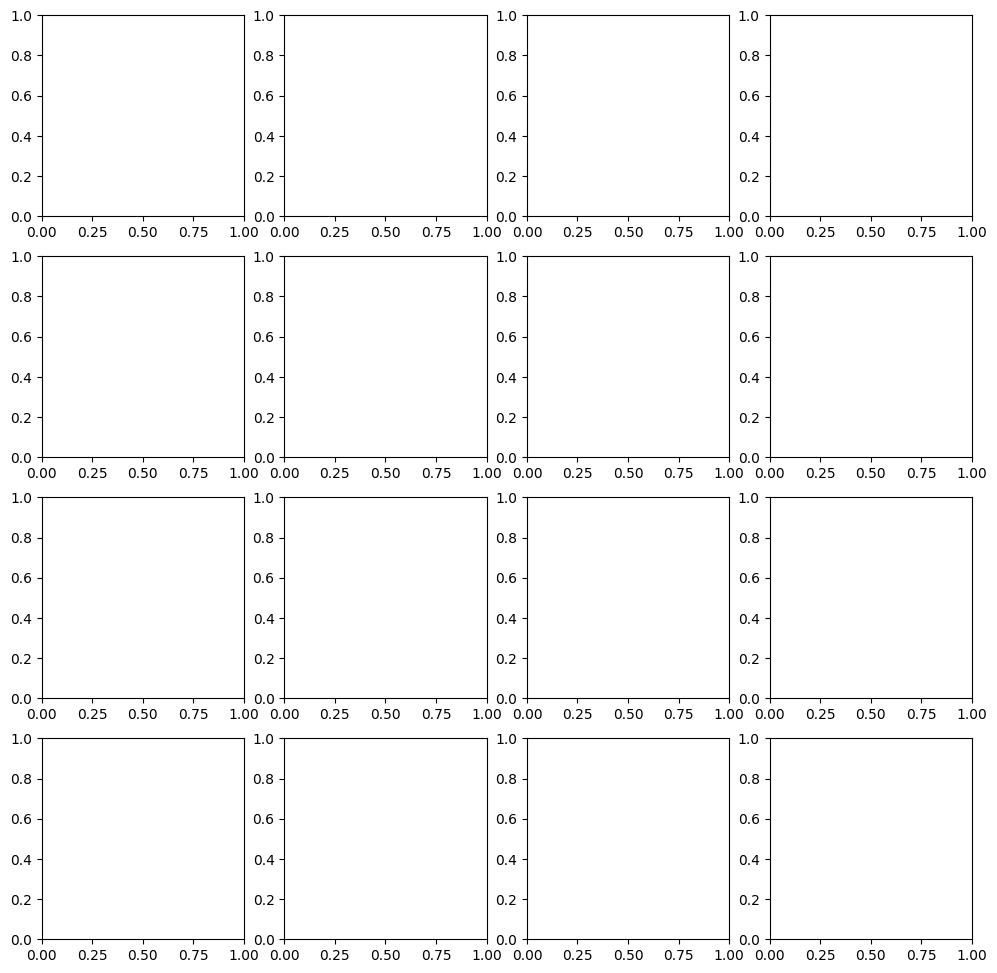

In [7]:
plt.style.use('default')
fig, axes = plt.subplots(4,4, figsize=(12,12))
for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(img[:,1 + i:,])
plt.show() # ciao 

In [21]:
import pandas as pd
import os

path = 'dataset/'
df = pd.DataFrame(columns=['image', 'mask', 'label'])

for folder in os.listdir(path):
    for file in os.listdir(os.path.join(path, folder)):
        if file.find('mask') == -1:
            df = pd.concat([df, pd.DataFrame({'image': [os.path.join(path, folder, file)],
                                        'mask': [os.path.join(path, folder, file.replace('.png', '_mask.png'))],
                                        'label': [0 if 'benign' in file else 1]})])
df.index = range(1, len(df) + 1)

In [23]:
df

,image,mask,label
1,dataset/malignant/malignant (206).png,dataset/malignant/malignant (206)_mask.png,1
2,dataset/malignant/malignant (178).png,dataset/malignant/malignant (178)_mask.png,1
3,dataset/malignant/malignant (197).png,dataset/malignant/malignant (197)_mask.png,1
4,dataset/malignant/malignant (51).png,dataset/malignant/malignant (51)_mask.png,1
5,dataset/malignant/malignant (47).png,dataset/malignant/malignant (47)_mask.png,1
...,...,...,...
643,dataset/benign/benign (184).png,dataset/benign/benign (184)_mask.png,0
644,dataset/benign/benign (350).png,dataset/benign/benign (350)_mask.png,0
645,dataset/benign/benign (215).png,dataset/benign/benign (215)_mask.png,0
646,dataset/benign/benign (15).png,dataset/benign/benign (15)_mask.png,0
